<h1 style="color:rgb(0,120,170)">Assignment 6: Logistic Regression</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

Don't import any additional modules, everything you need for solving the tasks is already there.

We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type.

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest they won't be available either.

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import matplotlib
import matplotlib.pyplot as plt
from IPython.utils import io
RSEED = 212

The goal of this exercise is to implement logistic regression from scratch using only numpy. Start with the following tasks:

* Implement the formula for the gradient computed in the lecture. In particular you should implement a function 
`logistic_gradient(w, x, y)` that takes a parameter vector
$\mathbf{w}$, a data matrix $\mathbf{X}$ and a label vector
$\mathbf{y}$ and returns the gradient $\frac{\partial L}{\partial
\mathbf{w}}$, where $L$ is the negative log-likelihood for the Bernoulli distribution, i.e. the cross-entropy loss.

* Implement a function `cost(w, x, y)`, that takes the same parameters but returns the cross-entropy loss.

* Test whether the gradient calculated by `logistic_gradient(w, x, y)` is correct via Gradient Checking. To do so, implement
a function `numerical_gradient(w, x, y)` that takes the same parameters
as `logistic_gradient`, but calculates the gradient numerically via the central difference quotient, using $\epsilon = 10^{-4}$ as suggested in the lecture slides.

* Implement a function `initialize(seed,n,d)` that generates a random data matrix consisting of 5 data points with 10 features drawn from a standard normal distribution as well as corresponding random binary labels and a random weight vector, whose entries again stem from the standard normal distribution. To generate the distributions use `np.random.normal` and `np.random.randint`.

* Use the weights, data and labels as input for both the analytical and numerical gradient and compare the outputs by implementing the function `comparison(a,b)` which checks whether the inputs $a$ and $b$ don't deviate more than 1e-09 from each other. **Hint:** Have a look at np.allclose... 

<h3 style="color:rgb(210,90,80)">Code (40 points):</h3>

In [96]:
"""
Function that computes the logistic gradient.
@param w, np ndarray, weights
@param x, np ndarray, data matrix
@param y, np ndarray, data vector

@output gradient, np ndarray, computed gradient
"""
def logistic_gradient(w, x, y):  
    s = 1 / (1 + np.exp(-(w.T.dot(x))))
#     print('w',w.shape)
#     print('x',x.shape)
#     print('y',y.shape)
#     print('s',s.shape)
    gradient = (x).dot((s - y).T)
    
    
    return gradient

"""
Function that computes the cross-entropy loss.
@param w, np ndarray, weights
@param x, np ndarray, data matrix
@param y, np ndarray, data vector

@output costs, float, computed cost
"""
def cost(w, x, y):
   
    s = 1 / (1 + np.exp(-(w.T.dot(x))))
    costs = y * np.log(s) + (1 - y) * np.log(1 - s)
    
    return -costs

"""
Function that computes the numerical gradient.
@param w, np ndarray, weights
@param x, np ndarray, data matrix
@param y, np ndarray, data vector

@output dw, np ndarray, computed numerical gradient
"""
def numerical_gradient(w, x, y):
    epsilon = 1e-4
    dw = []
    w_copy = w.copy()
    
    for i in range(len(w)):
        w_copy[i] += epsilon 
        cost_plus = np.sum(cost(w_copy,x,y))
        
        w_copy[i] -= 2*epsilon 
        cost_minus = np.sum(cost(w_copy,x,y))
        
        dw.append([(cost_plus - cost_minus)/(2*epsilon)])
        w_copy[i] += epsilon
        
    return np.array(dw)

"""
Function that initializes X,y and the weights.
@param seed, int, seed for random data generation
@param n, int, number of data points
@param d, int, number of features


@output X_random, np ndarray, randomly generated data matrix
@output y_random, np ndarray, randomly generated data vector
@output w_random, np ndarray, randomly generated weights
"""
def initialize(seed,n,d):
    np.random.seed(seed)
    X_random = np.random.standard_normal(size=(d,n))
    y_random = np.random.randint(low=0, high=2, size=(1,n))
    w_random = np.random.standard_normal(size=(d,1))
    
    return X_random,y_random,w_random

"""
Function that compare two arrays whether they are similar or not.
@param a, np ndarray, input array for comparison nr. 1
@param b, np ndarray, input array for comparison nr. 2

@output comp, boolean, True if arrays a and b are similar (within tolerance), False if not
"""
def comparison(a,b):
#     print('a',a.shape)
#     print(b.shape)
    comp =  np.allclose(a,b)
    
    
    return comp

In [97]:
X_random, y_random, w_random=initialize(RSEED,5,10)

print("X =",X_random,"\n")
print("y =",y_random,"\n")
print("w = ",w_random,"\n")
print("Logistic gradient:\n",logistic_gradient(w_random,X_random,y_random),"\n")
print("Numerical gradient:\n",numerical_gradient(w_random,X_random,y_random),"\n")
print("Difference smaller than 1e-09: ",comparison(logistic_gradient(w_random,X_random,y_random),numerical_gradient(w_random,X_random,y_random)))

X = [[ 0.22934691 -0.14879703 -1.13444518 -1.07508702 -0.36619224]
 [-0.95191728 -0.85861473 -0.67974795  0.68845059  0.1948118 ]
 [-0.4486308   0.50426521 -0.58570229  0.41588808  0.19039122]
 [ 0.67263512  0.81036887  1.61211999 -2.4590425   0.26708358]
 [ 0.29480346  1.07211943  0.85752031  1.11543398  0.68396215]
 [ 0.68649908 -0.05759227  0.20913827  0.40064854 -1.23310935]
 [ 0.7979281  -0.10941365 -0.36531184 -0.64907323 -1.10113995]
 [ 0.13652613 -0.55446718  1.69952363  0.03674109  0.37669998]
 [ 0.96435094  0.21656631  0.23643905 -0.69816277 -0.19998787]
 [-0.93434808  1.11417079  1.801827   -0.1510894   0.52064031]] 

y = [[0 0 1 0 1]] 

w =  [[ 0.77923677]
 [ 0.32106637]
 [-1.96031022]
 [ 0.68532421]
 [-0.91475214]
 [-0.39098802]
 [-0.29178856]
 [ 0.24076716]
 [ 0.16036923]
 [-1.1162128 ]] 

Logistic gradient:
 [[ 1.28372891]
 [-0.44035772]
 [-0.03100865]
 [-0.85404905]
 [-0.80652839]
 [ 1.2623177 ]
 [ 1.68456984]
 [-1.46283908]
 [ 0.7648794 ]
 [-2.47149713]] 

Numerical gr

Next we intend to apply logistic regression on a real data set.

* Implement a function `fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=1e5)` that uses Logistic Regression with Gradient Descent to train classifiers on the training set. Use randomly initialized weights, drawn from a uniform distribution between $-1$ and $1$, a learning rate $\eta$ (eta) of $10^{-4}$ and a maximum number of iterations of $1e5$. Furthermore the algorithm should stop if the difference between the loss of the last iteration step and the current loss is less than $\eta$. Also print the losses in $1000$ step intevals. The function should return the model weights(np.array) and the number of iterations used while training.
* Furthermore, implement a function `predictLogReg(w, x)` that returns the prediction for the given parameter vector $\mathbf{w}$ and feature vector $\mathbf{x}$ (np.array).

**Hint:** for intialization of the weights use `np.random.uniform`.

<h3 style="color:rgb(208,90,80)">Code (30 points)</h3>


In [138]:
"""
Function trains a Logistic Regression Model with Gradient Descent.
@param x_train, np ndarray, data matrix
@param y_train, np ndarray, data vector
@param eta, float, learning rate
@param max_iter, int, maximum number of iterations before function terminates
@param seed, int, seed for the random initialization of the weights

@output w, np ndarray, computed weights
@output iterations, int, number of iterations used while training
"""
def fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=100000,seed=RSEED):
    x, y = x_train, y_train
    w = np.random.uniform(low=-1.0, high=1.0, size=(x.shape[0],1))
    iterations = 0
    last_loss = 0
    
    for i in range(max_iter):
#         print('w',w.shape)
#         print('log',logistic_gradient(w, x, y).shape)
        loss = np.sum(cost(w, x, y))
    
        w_1 = w - eta * logistic_gradient(w, x, y)
        
        if abs(loss - last_loss) < eta:
            print(f"\nOptimum found at iteration {i}")
            return w_1, i
        
        if i in range(0, max_iter, 1000):
            print(f"Loss for W_{i}: {loss}")
            
        w = w_1
        iterations += iterations
        last_loss = loss
        
    print(f"The maximum number of iterations ({max_iter}) have been reached.")
    
    return w_1, iterations

"""
Function that computes the predictions for Logistic regression.
@param w, np ndarray, weights
@param x, np ndarray, data matrix

@output pred, np ndarray, predictions
"""
def predictLogReg(w, x):
    pred = 1 / (1 + np.exp(-(w.T.dot(x))))
    return pred.squeeze()

In the following cell the data set `DataSet_LR_a.csv` is loaded and split into a training set and a test set ($50\,\%$ each). Now you should:
* classify samples as class `1` if the Logistic Regression returns values $\geq 0.5$ and `0` otherwise. Do this in the function `confusion_matrix_acc(predictions,true_labels,threshold)` which has to be implemented by you and use it to compute the confusion matrix and to calculate Accuracy and Balanced Accuracy for the training and on the test set respectively. The ouput of this function should be a tuple of 8 float values (not rounded). 
* Provide ROC curves of the classifiers on the test samples and compute the corresponding AUC. Label the axes appropriately. Use the functions `roc_curve` and `auc` from `sklearn.metrics` for this purpose.

<h3 style="color:rgb(208,90,80)">Code (30 points)</h3>


[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]


<ipython-input-139-dcd7b162666d>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=X[:np.int(X.shape[0]/2)]
<ipython-input-139-dcd7b162666d>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

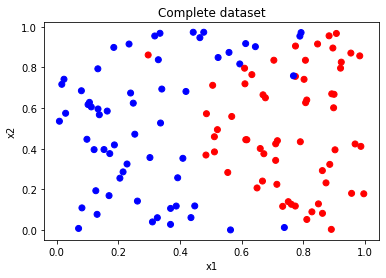

In [139]:
#nothing to do here
# Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
X = np.hstack((np.ones((X.shape[0],1)),X))   #prepend ones for intercept

# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,1], X[:,2], c=color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Complete dataset')
# Split into test and training set
X_train=X[:np.int(X.shape[0]/2)]
X_test=X[np.int(X.shape[0]/2):]
y_train=y[:np.int(len(y)/2)]
y_test=y[np.int(len(y)/2):]
print(y_train)

In [140]:
#nothing to do here
weights,_ = fitLogRegModel(X_train.T,y_train)
print("The learnt weights are: w =",weights)

Loss for W_0: 41.66053623530603
Loss for W_1000: 33.78565259952165
Loss for W_2000: 31.56198436108182
Loss for W_3000: 29.809160994420235
Loss for W_4000: 28.3777578267256
Loss for W_5000: 27.1943853872186
Loss for W_6000: 26.204803297517046
Loss for W_7000: 25.3684174112432
Loss for W_8000: 24.65458564197233
Loss for W_9000: 24.039934927359553
Loss for W_10000: 23.506434360920867
Loss for W_11000: 23.040014187863743
Loss for W_12000: 22.629572121199335
Loss for W_13000: 22.266253123731776
Loss for W_14000: 21.942922623560033
Loss for W_15000: 21.65377733653337
Loss for W_16000: 21.39405475930108
Loss for W_17000: 21.159814061853012
Loss for W_18000: 20.947769149154663
Loss for W_19000: 20.755160219483937
Loss for W_20000: 20.579654010782345
Loss for W_21000: 20.419265632033984
Loss for W_22000: 20.272296787257186
Loss for W_23000: 20.137286560730807
Loss for W_24000: 20.012971910418578
Loss for W_25000: 19.898255726170447
Loss for W_26000: 19.792180828583238

Optimum found at iteratio

In [141]:
#nothing to do here
prediction_train = predictLogReg(weights,X_train.T)
prediction_test = predictLogReg(weights,X_test.T)

Text(0.5, 1.0, 'Test dataset - predictions')

<Figure size 432x288 with 0 Axes>

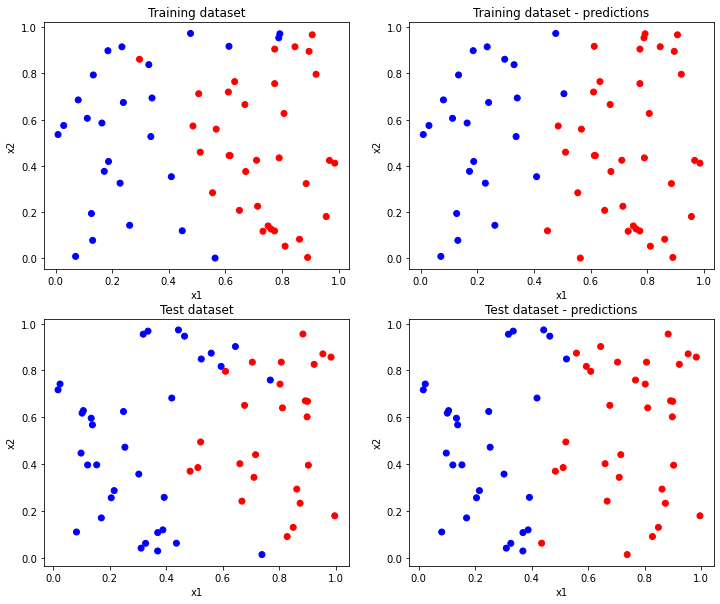

In [142]:
# Nothing to do here
# Plot training and test dataset
# Plot predictions for training and test dataset

fig = plt.figure()
fig = plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
plt.scatter(X_train[:,1], X_train[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset')

plt.subplot(2, 2, 2)
color= ['red' if elem>0.5 else 'blue' for elem in prediction_train ]
plt.scatter(X_train[:,1], X_train[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset - predictions')

plt.subplot(2, 2, 3)
color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
plt.scatter(X_test[:,1], X_test[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset')

plt.subplot(2, 2, 4)
color= ['red' if elem>0.5 else 'blue' for elem in prediction_test ]
plt.scatter(X_test[:,1], X_test[:,2], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset - predictions')

In [152]:
"""
Function that computes the predictions for Logistic regression.
@param predictions, np ndarray, predicted values
@param true_labels, np ndarray, true labels - entries are either 0 or 1

@output pos, float, nr of positive (true) samples
@output neg, float, nr of negative (true) samples
@output tp, float, nr of correctly classified positive samples
@output tn, float, nr of correctly classified negative samples
@output fp, float, nr of wrongly classified negative samples
@output fn, float, nr of wrongly classified positive samples
@output acc, float, accuracy
@output balanced_acc, float, balanced accuracy
"""
def confusion_matrix_acc(predictions,true_labels,threshold=0.5):    
    pos = np.zeros_like(predictions)
    neg = np.zeros_like(predictions)
    pos[predictions >= threshold] = 1 
    neg[predictions < threshold] = 1
    
    tp = np.sum(pos[true_labels==1])
    tn = np.sum(neg[true_labels==0])
    fp = np.sum(pos[true_labels==0])
    fn = np.sum(neg[true_labels==1])
    
    acc = (tp+tn) / (tp+tn+fp+fn)
    tpr = tp/(tp+fn)
    tnr = tn/(tn+fp)
    balanced_acc = (tpr+tnr) / 2

    return (pos,neg,tp,tn,fp,fn,acc,balanced_acc)

In [153]:
pos_train,neg_train,tp_train,tn_train,fp_train,fn_train,acc_train,balanced_acc_train=confusion_matrix_acc(prediction_train,y_train)
print("Train samples:\n")
print("Positive samples: {}\nNegative samples: {}\nTrue positives: {}\nTrue negatives: {}\nFalse positives: {}\nFalse negatives: {}\nAccuracy: {}\nBalanced accuray: {}\n".format(pos_train,neg_train,tp_train,tn_train,fp_train,fn_train,acc_train,balanced_acc_train))
pos_test,neg_test,tp_test,tn_test,fp_test,fn_test,acc_test,balanced_acc_test=confusion_matrix_acc(prediction_test,y_test)
print("Test samples:\n")
print("Positive samples: {}\nNegative samples: {}\nTrue positives: {}\nTrue negatives: {}\nFalse positives: {}\nFalse negatives: {}\nAccuracy: {}\nBalanced accuray: {}".format(pos_test,neg_test,tp_test,tn_test,fp_test,fn_test,acc_test,balanced_acc_test))

Train samples:

Positive samples: [0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
Negative samples: [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.]
True positives: 32.0
True negatives: 21.0
False positives: 5.0
False negatives: 2.0
Accuracy: 0.8833333333333333
Balanced accuray: 0.8744343891402715

Test samples:

Positive samples: [1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
Negative samples: [0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.]
True posit

<Figure size 432x288 with 0 Axes>

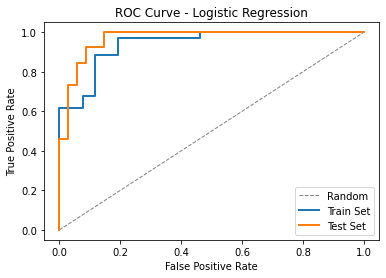

Train Set
  Area under curve: 0.9411764705882353

Test Set
  Area under curve: 0.9671945701357466



In [156]:
plot_ = plt.figure()
#Your Code

fpr_test, tpr_test, _ = roc_curve(y_test, prediction_test)
fpr_train, tpr_train, _ = roc_curve(y_train, prediction_train)

roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--', label="Random")
plt.plot(fpr_train, tpr_train,lw=2, label="Train Set")
plt.plot(fpr_test, tpr_test, lw=2, label="Test Set")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

print("Train Set"
      f"\n  Area under curve: {roc_auc_train}\n")
print("Test Set"
      f"\n  Area under curve: {roc_auc_test}\n")

In [ ]:
#executability check
logistic_gradient(np.ones(2), np.ones((2,2)), np.ones(2))
cost(np.ones(2), np.ones((2,2)), np.ones(2))
numerical_gradient(np.ones(2), np.ones((2,2)), np.ones(2))
initialize(RSEED,1,1)
comparison(np.ones(5),np.ones(5))
fitLogRegModel(np.ones((2,2)), np.ones(2), eta=1e-4, max_iter=100000)
predictLogReg(np.ones(2), np.ones((2,2)))
confusion_matrix_acc(np.ones(5),np.ones(5),threshold=0.5)
print("Executable!")